In [4]:
from jupyterthemes import get_themes
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.impute import SimpleImputer

dataset = pd.read_csv('/home/jovyan/datasets/Social_Network_Ads.csv')
dataset
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values


In [2]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [81]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)


In [3]:
# Fitting the classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [4]:
y_pred = classifier.predict(X_test)

In [5]:
i = 0
while i < len(y_pred):

    if(y_pred[i] != y_test[i]):
        print("pred: ",y_pred[i], " actual: ", y_test[i], '<------WRONG')
    else:
        print("pred: ",y_pred[i], " actual: ", y_test[i])
    i = i + 1

pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  1  actual:  1
pred:  0  actual:  0
pred:  1  actual:  0 <------WRONG
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  1  actual:  0 <------WRONG
pred:  1  actual:  0 <------WRONG
pred:  0  actual:  0
pred:  1  actual:  1
pred:  0  actual:  0
pred:  0  actual:  0
pred:  1  actual:  1
pred:  0  actual:  0
pred:  1  actual:  1
pred:  0  actual:  0
pred:  0  actual:  1 <------WRONG
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  1  actual:  1
pred:  1  actual:  1
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  1  actual:  1
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  0  actual:  0
pred:  1  actual:  1
pre

In [6]:
from sklearn.metrics import confusion_matrix
cm =  confusion_matrix(y_test, y_pred)
print(cm)

[[63  5]
 [ 3 29]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


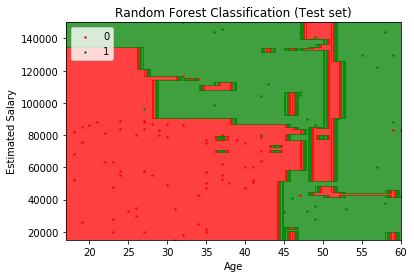

In [7]:
# Visualizing the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, s=2)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


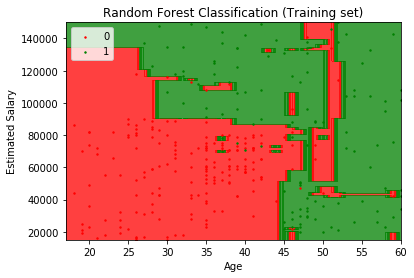

In [8]:
# Visualize the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j, s=2)
plt.title('Random Forest Classification (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()